In [1]:
from keras.datasets import mnist

In [3]:
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.models import Sequential

In [4]:
import matplotlib.pyplot as plt

In [5]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

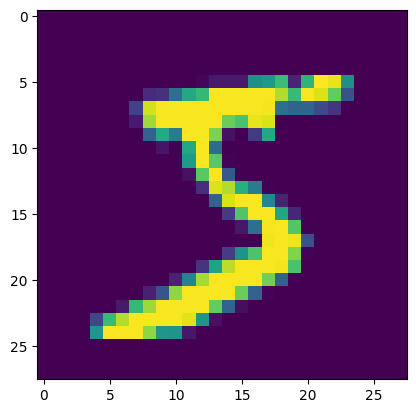

In [8]:
plt.imshow(train_images[0])

In [9]:
train_labels[0]

5

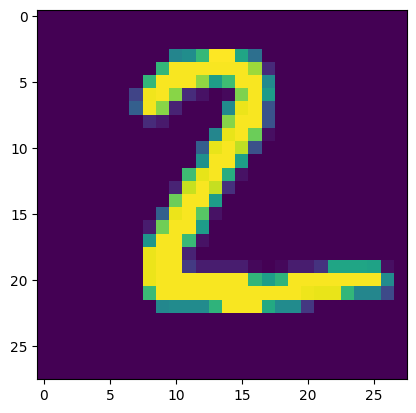

In [10]:
plt.imshow(test_images[1])

In [11]:
test_labels[1]

2

In [12]:
train_images,test_images=train_images/255.0,test_images/255.0

In [13]:
import numpy as np

In [16]:
train_images=train_images.reshape(60000,28,28,1)

In [17]:
test_images=test_images.reshape(10000,28,28,1)

In [19]:
from keras.utils import to_categorical

In [20]:
train_labels=to_categorical(train_labels)

In [21]:
test_labels=to_categorical(test_labels)

In [22]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
cnn_model=Sequential()

In [25]:
cnn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [26]:
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64,(3,3),activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(10,activation='softmax'))

In [27]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [28]:
cnn_model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1329 - accuracy: 0.9604
Epoch 2/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 3/3
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0310 - accuracy: 0.9902


In [31]:
predictions=cnn_model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [33]:
for i in range(3):
 print("predictions",predictions[i])
 print("Test Labels",test_labels[i])

predictions [5.1605614e-10 4.7642168e-10 8.7604508e-07 3.4906407e-05 2.5722488e-11
 6.7978323e-10 3.7437967e-16 9.9996382e-01 1.2248188e-08 3.8135278e-07]
Test Labels [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predictions [3.0577777e-08 2.3001081e-07 9.9999958e-01 2.4318459e-11 8.7639089e-12
 1.8823129e-11 1.2039820e-07 8.9175715e-12 2.1672422e-09 3.5584411e-12]
Test Labels [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
predictions [1.0149642e-07 9.9992615e-01 2.0169514e-06 3.5263920e-08 2.3368535e-05
 5.7116299e-06 1.2605103e-07 3.1818596e-05 1.0215160e-05 3.5065742e-07]
Test Labels [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
